In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [197]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [198]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [199]:
df.shape

(150, 6)

In [200]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [201]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [202]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [203]:
df.drop(["Id"],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [204]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

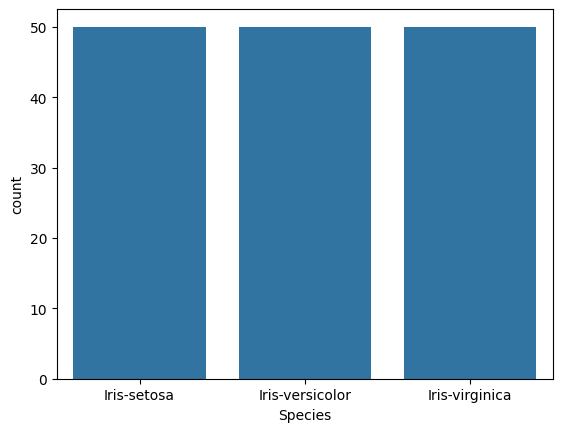

In [205]:
sns.countplot(x="Species",data=df)

Text(0.5, 1.0, 'Boxplot of all features')

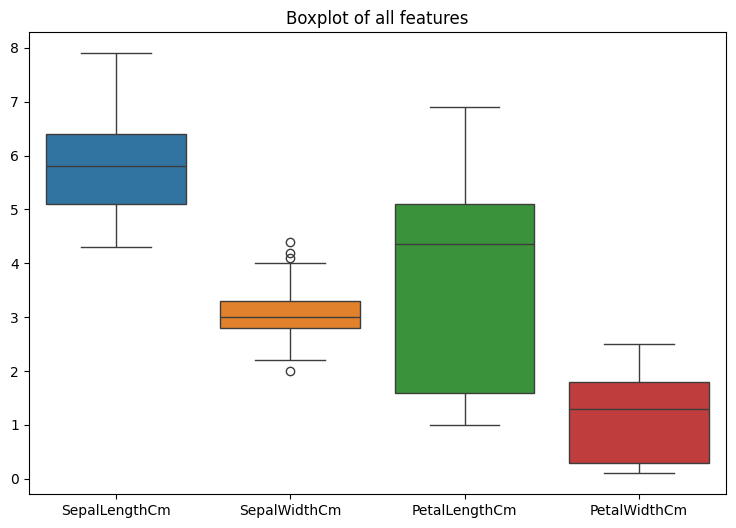

In [206]:
numeric_cols=df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(9,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of all features")

In [207]:
# f=df["SepalWidthCm"].mean()
# for i in df.index:
#     if df.loc[i,"SepalWidthCm"]>4 or df.loc[i,"SepalWidthCm"]<2.25:
#         df.loc[i,"SepalWidthCm"]=f

In [208]:

outlier_columns=["SepalWidthCm"]
def removal_outliers(df,columns):
    for i in columns:

        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1

        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        df=df[(df[i]>=lower_bound)&(df[i]<=upper_bound)]
    return df
df_cleaned=removal_outliers(df,outlier_columns)

<Axes: ylabel='SepalWidthCm'>

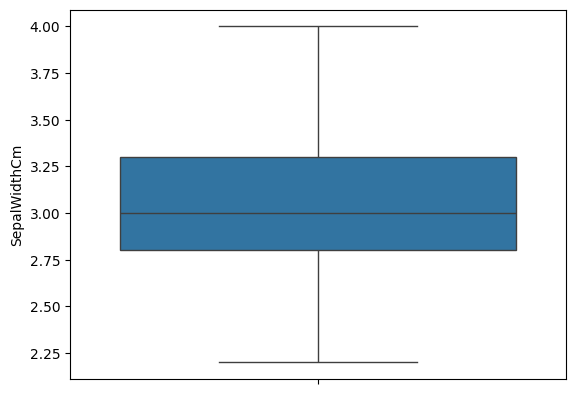

In [209]:
sns.boxplot(y="SepalWidthCm",data=df_cleaned)

In [210]:
x=df_cleaned.iloc[:,:-1].values
y=df_cleaned.iloc[:,-1].values

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [212]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.99384927,  1.51838413, -1.38802117, -1.36325956],
       [-0.87719492, -1.42906742, -0.48010512, -0.18151048],
       [-1.69377534,  0.44658357, -1.44476592, -1.36325956],
       [-0.87719492,  0.98248385, -1.33127642, -1.36325956],
       [ 2.15581803,  2.05428442,  1.61945075,  1.26284951],
       [ 1.22258328,  0.17863343,  0.88176896,  1.13154406],
       [ 1.68920066, -0.35726686,  1.39247174,  0.7376277 ],
       [ 0.28934852, -0.35726686,  0.48455569,  0.21240588],
       [-0.76054058, -0.89316714,  0.03059766,  0.21240588],
       [ 0.52265721, -0.35726686,  0.99525847,  0.7376277 ],
       [ 2.15581803, -0.625217  ,  1.61945075,  1.0002386 ],
       [-0.17726886, -0.08931671,  0.20083192, -0.05020503],
       [-1.22715796,  0.98248385, -1.27453166, -1.36325956],
       [ 2.15581803, -1.16111728,  1.73294026,  1.39415496],
       [-0.2939232 , -0.08931671,  0.14408717,  0.08110043],
       [-1.22715796, -0.08931671, -1.38802117, -1.49456502],
       [-1.3438123 ,  0.

In [213]:
y_train

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', '

In [214]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [215]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 13]])

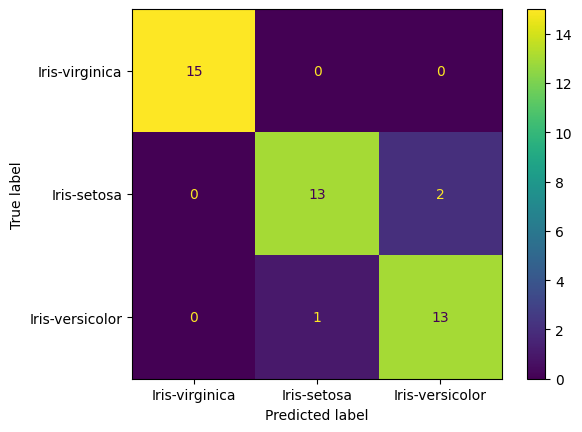

In [216]:
labels=['Iris-virginica','Iris-setosa','Iris-versicolor']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [217]:
score=accuracy_score(y_test,y_pred)
score

0.9318181818181818

In [218]:
report=classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        44
      macro avg       0.93      0.93      0.93        44
   weighted avg       0.93      0.93      0.93        44



[Text(0.4, 0.9166666666666666, 'PetalLengthCm <= -0.792\nentropy = 1.583\nsamples = 102\nvalue = [32, 34, 36]\nclass = Iris-versicolor'),
 Text(0.2, 0.75, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = Iris-virginica'),
 Text(0.30000000000000004, 0.8333333333333333, 'True  '),
 Text(0.6, 0.75, 'PetalWidthCm <= 0.541\nentropy = 0.999\nsamples = 70\nvalue = [0, 34, 36]\nclass = Iris-versicolor'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.4, 0.5833333333333334, 'PetalLengthCm <= 0.626\nentropy = 0.406\nsamples = 37\nvalue = [0, 34, 3]\nclass = Iris-setosa'),
 Text(0.2, 0.4166666666666667, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.4166666666666667, 'SepalLengthCm <= 0.348\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-versicolor'),
 Text(0.4, 0.25, 'PetalLengthCm <= 0.683\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-setosa'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [

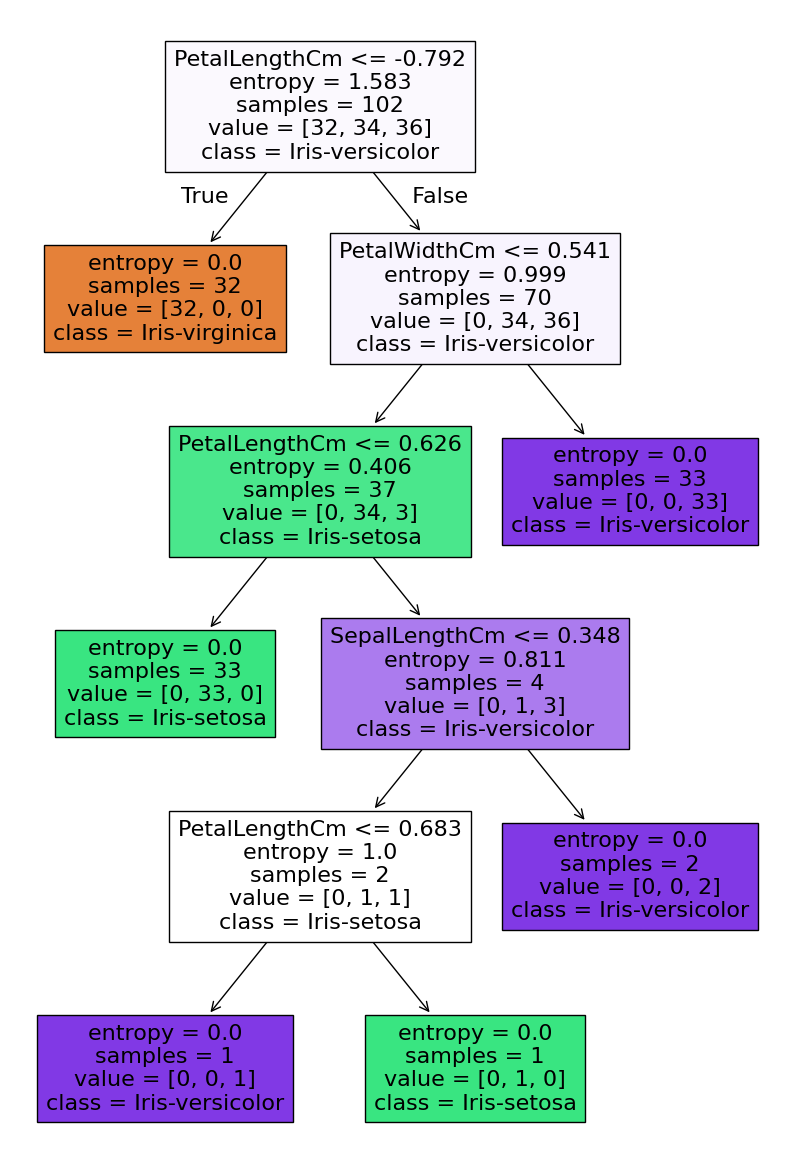

In [219]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(model,feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],class_names=['Iris-virginica','Iris-setosa','Iris-versicolor'],filled=True)